# MPMS Results on DA2-r
FC-ZFC-RT-SIRM

Frequency dependency of Xusceptibility

DA2-R-FC-ZFC-RT-SIRM-AC_sweep.dat -- data file

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math

In [2]:
##Sample mass in kg
mass = 0.188*0.001 #TODO: change this for DA2-r

In [3]:
## Frequency values 
freqs = [1.000576 , 5.316651 , 28.257017, 150.471878, 800.461121]


In [16]:
## Row numbers 
m_start = 47
FC_start = 47
ZFC_start = 339
RT_SIRM_cool_start = 631
RT_SIRM_warm_start = 922
X_start = 1215
X_end = 1509

n_freq = 5 ##number of different frequencies used

In [17]:
##Attempt no1 to not have to hard code in row shift

#start_numbers =  [FC_start, ZFC_start, RT_SIRM_cool_start, RT_SIRM_warm_start, X_start]
#for start_number in start_numbers:
#    start_number = start_number - 47
#    print(start_number)


In [18]:
##Attempt no2 to not have to hard code in row shift

##row_numbers = pd.DataFrame([47, 47, 337, 627, 863, 1156], ['m_start', 'FC_start', 'ZFC_start', 'RT_SIRM_cool_start', 'RT_SIRM_warm_start','X_start'], ['excel_number'])
##row_numbers['df_number'] = row_numbers['excel_number'] - 47
##row_numbers
##row_numbers.iat[2,0]

In [19]:
pwd ##check we are in the same place as the data


'C:\\Users\\murray98\\Documents\\IRM summer school\\code\\IRM-Summer-School-2022'

In [20]:
##Read in data
df = pd.read_csv(r'C:\Users\murray98\Documents\IRM summer school\mpms_data-20220612T225342Z-001\mpms_data\DA2-R-FC-ZFC-RT-SIRM-AC_sweep.dat', sep=",", skiprows=44 )
print(df)

      Comment  Time Stamp (sec)  Temperature (K)  Magnetic Field (Oe)  \
0         NaN      3.863238e+09        10.000119            25.284239   
1         NaN      3.863238e+09        10.288117            25.284239   
2         NaN      3.863238e+09        11.152489            25.284239   
3         NaN      3.863238e+09        12.029316            25.284239   
4         NaN      3.863238e+09        13.098715            25.284239   
...       ...               ...              ...                  ...   
1458      NaN      3.863278e+09       299.973511            25.346916   
1459      NaN      3.863279e+09       300.000534            25.346916   
1460      NaN      3.863279e+09       300.000580            25.346916   
1461      NaN      3.863279e+09       300.000748            25.346916   
1462      NaN      3.863279e+09       300.001892            25.346916   

      Moment (emu)  M. Std. Err. (emu)  Transport Action  \
0         0.000613        1.670352e-07                 1   
1  

In [21]:
df['Moment (Am2/kg)'] = df['Moment (emu)'] /(1000*mass)

In [22]:
d = 47 

FC_data = df.loc[FC_start -d : ZFC_start-d-1, ['Temperature (K)','Moment (Am2/kg)']]
print(FC_data)
ZFC_data = df.loc[ZFC_start-d : RT_SIRM_cool_start-d-1, ['Temperature (K)','Moment (Am2/kg)']]
print(ZFC_data)

RT_SIRM_cool_data = df.loc[RT_SIRM_cool_start-d : RT_SIRM_warm_start-d-1, ['Temperature (K)','Moment (Am2/kg)']]

RT_SIRM_warm_data = df.loc[RT_SIRM_warm_start-d : X_start-d-1, ['Temperature (K)','Moment (Am2/kg)']]



     Temperature (K)  Moment (Am2/kg)
0          10.000119         0.003262
1          10.288117         0.003642
2          11.152489         0.003638
3          12.029316         0.003626
4          13.098715         0.003606
..               ...              ...
287       296.114838         0.000853
288       297.019592         0.000852
289       298.014709         0.000852
290       299.001617         0.000851
291       299.943512         0.000850

[292 rows x 2 columns]
     Temperature (K)  Moment (Am2/kg)
292         9.999993         0.002912
293        10.096929         0.003238
294        11.004624         0.003233
295        12.022876         0.003228
296        13.130440         0.003215
..               ...              ...
579       296.089020         0.000866
580       297.024139         0.000865
581       298.011047         0.000865
582       299.001404         0.000864
583       299.944092         0.000863

[292 rows x 2 columns]


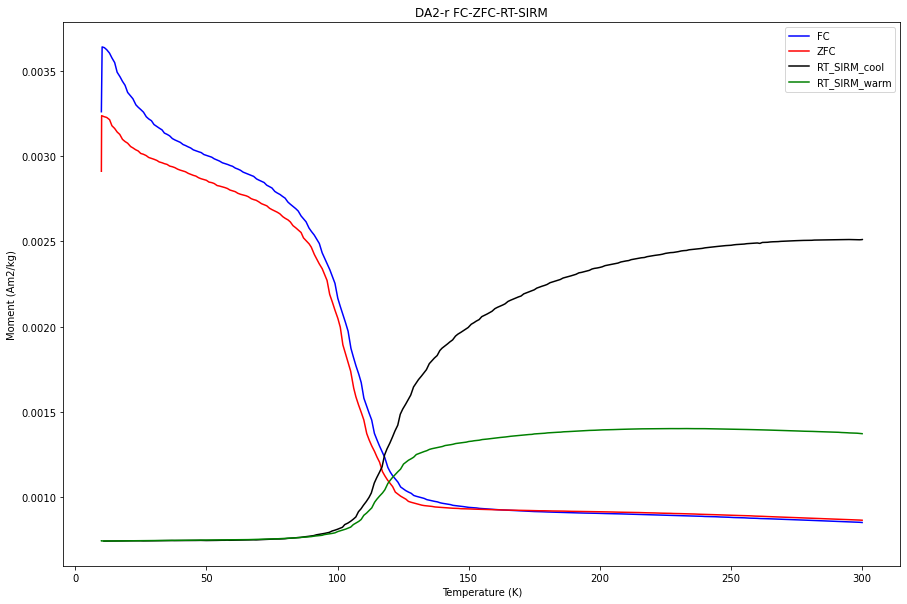

In [24]:
fig,ax = plt.subplots(figsize=(15,10))


ax.plot(FC_data["Temperature (K)"] , FC_data['Moment (Am2/kg)'], label = 'FC', color = 'blue')
ax.plot(ZFC_data["Temperature (K)"] , ZFC_data['Moment (Am2/kg)'], label = 'ZFC', color = 'red')
ax.plot(RT_SIRM_cool_data["Temperature (K)"] , RT_SIRM_cool_data['Moment (Am2/kg)'], label = 'RT_SIRM_cool', color='black')
ax.plot(RT_SIRM_warm_data["Temperature (K)"] , RT_SIRM_warm_data['Moment (Am2/kg)'], label = 'RT_SIRM_warm', color='green')

ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Moment (Am2/kg)')
ax.set_title('DA2-r FC-ZFC-RT-SIRM')

ax.legend()


##Observations

FC starts above ZFC (0.0037 vs 0.0032 Am2/kg) 

Both drop steeply from 0K to 120K 

ZFC changes slope at 30K, shallows then steeper drop at 120K, 

These temperatures can be quantified by taking derivatives from the slopes. 

RT_SIRM_cool is much higher than the RT_SIRM_warm at high temperatures (above 100K) 
RT_SIRM_warm flattens off 


## Frequency dependence of AC susceptibility 

In [25]:
##Split out section for freq dependence of AC susceptibility
X_data = df.loc[(X_start - m_start):, ['Temperature (K)','AC Susceptibility (emu/Oe)', 'AC Frequency (Hz)']]
print(X_data)

      Temperature (K)  AC Susceptibility (emu/Oe)  AC Frequency (Hz)
1168         9.999431                    0.000003           1.000576
1169         9.999197                    0.000003           5.316651
1170         9.999721                    0.000003          28.257017
1171         9.999817                    0.000003         150.471878
1172        10.000069                    0.000003         800.461121
...               ...                         ...                ...
1458       299.973511                    0.000004           1.000576
1459       300.000534                    0.000004           5.316651
1460       300.000580                    0.000004          28.257017
1461       300.000748                    0.000004         150.471878
1462       300.001892                    0.000004         800.461121

[295 rows x 3 columns]


In [26]:
##Make my life 4 letters easier
pi = math.pi
pi

3.141592653589793

In [27]:
## Convert from CGS to SI and normalise by mass
X_data['AC Susceptibility (m3/kg)'] = X_data['AC Susceptibility (emu/Oe)'] * 4 * pi * 1e-6 /mass
X_data.head

<bound method NDFrame.head of       Temperature (K)  AC Susceptibility (emu/Oe)  AC Frequency (Hz)  \
1168         9.999431                    0.000003           1.000576   
1169         9.999197                    0.000003           5.316651   
1170         9.999721                    0.000003          28.257017   
1171         9.999817                    0.000003         150.471878   
1172        10.000069                    0.000003         800.461121   
...               ...                         ...                ...   
1458       299.973511                    0.000004           1.000576   
1459       300.000534                    0.000004           5.316651   
1460       300.000580                    0.000004          28.257017   
1461       300.000748                    0.000004         150.471878   
1462       300.001892                    0.000004         800.461121   

      AC Susceptibility (m3/kg)  
1168               2.255022e-07  
1169               2.249610e-07  
117

<AxesSubplot:xlabel='Temperature (K)', ylabel='AC Susceptibility (m3/kg)'>

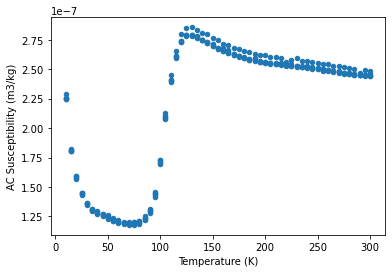

In [28]:
##Plot all data together
X_data.plot.scatter(x="Temperature (K)", y='AC Susceptibility (m3/kg)')

In [29]:
##Neater way of doing the same thing as below to split the data by frequency, unfinished

##freqs = [2, 6, 29, 151, 801]
##i=0
##for freq in freqs:
  ##  mask = X_data['AC Frequency (Hz)'] <= freq
  ##  X_freq = X_data[mask]
  ##  X_freq_rest = X_freq[~mask]
  ##  print(X_freq)

In [30]:
mask = X_data['AC Frequency (Hz)'] <= (freqs[0]+1)
X_freq1 = X_data[mask]
print(X_freq1)

X_freq_1 = X_data[~mask]
print (X_freq_1)

      Temperature (K)  AC Susceptibility (emu/Oe)  AC Frequency (Hz)  \
1168         9.999431                    0.000003           1.000576   
1173        14.999334                    0.000003           1.000576   
1178        20.000504                    0.000002           1.000576   
1183        25.000215                    0.000002           1.000576   
1188        30.000072                    0.000002           1.000576   
1193        35.000200                    0.000002           1.000576   
1198        40.000290                    0.000002           1.000576   
1203        44.999979                    0.000002           1.000576   
1208        49.999975                    0.000002           1.000576   
1213        54.999617                    0.000002           1.000576   
1218        59.999208                    0.000002           1.000576   
1223        64.999115                    0.000002           1.000576   
1228        69.997837                    0.000002           1.00

In [31]:
mask2 = (X_data['AC Frequency (Hz)'] < (freqs[1]+1)) 
X_freq2 = X_freq_1[mask2]
print(X_freq2)
X_freq_2 = X_freq_1[~mask2]
print(X_freq_2)

      Temperature (K)  AC Susceptibility (emu/Oe)  AC Frequency (Hz)  \
1169         9.999197                    0.000003           5.316651   
1174        14.998886                    0.000003           5.316651   
1179        19.999961                    0.000002           5.316651   
1184        24.999972                    0.000002           5.316651   
1189        29.999954                    0.000002           5.316651   
1194        34.999786                    0.000002           5.316651   
1199        40.000153                    0.000002           5.316651   
1204        45.000154                    0.000002           5.316651   
1209        50.000023                    0.000002           5.316651   
1214        54.999815                    0.000002           5.316651   
1219        59.999697                    0.000002           5.316651   
1224        64.999683                    0.000002           5.316651   
1229        69.999741                    0.000002           5.31

C:\Users\murray98\AppData\Local\Temp/ipykernel_6876/655139571.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_freq2 = X_freq_1[mask2]
C:\Users\murray98\AppData\Local\Temp/ipykernel_6876/655139571.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_freq_2 = X_freq_1[~mask2]


In [32]:
mask3 = (X_data['AC Frequency (Hz)'] < (freqs[2]+1)) 
X_freq3 = X_freq_2[mask3]
print(X_freq3)
X_freq_3 = X_freq_2[~mask3]
print(X_freq_3)

      Temperature (K)  AC Susceptibility (emu/Oe)  AC Frequency (Hz)  \
1170         9.999721                    0.000003          28.257017   
1175        14.999461                    0.000003          28.257017   
1180        20.000026                    0.000002          28.257017   
1185        24.999887                    0.000002          28.257017   
1190        30.000003                    0.000002          28.257017   
1195        34.999969                    0.000002          28.257017   
1200        39.999781                    0.000002          28.257017   
1205        44.999994                    0.000002          28.257017   
1210        49.999985                    0.000002          28.257017   
1215        55.000015                    0.000002          28.257017   
1220        60.000162                    0.000002          28.257017   
1225        64.999748                    0.000002          28.257017   
1230        69.999828                    0.000002          28.25

C:\Users\murray98\AppData\Local\Temp/ipykernel_6876/697552991.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_freq3 = X_freq_2[mask3]
C:\Users\murray98\AppData\Local\Temp/ipykernel_6876/697552991.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_freq_3 = X_freq_2[~mask3]


In [33]:
mask4 = (X_data['AC Frequency (Hz)'] < (freqs[3]+1)) 
X_freq4 = X_freq_3[mask4]
print(X_freq4)
X_freq_4 = X_freq_3[~mask4]
print(X_freq_4)

      Temperature (K)  AC Susceptibility (emu/Oe)  AC Frequency (Hz)  \
1171         9.999817                    0.000003         150.471878   
1176        14.999627                    0.000003         150.471878   
1181        19.999855                    0.000002         150.471878   
1186        25.000038                    0.000002         150.471878   
1191        29.999863                    0.000002         150.471878   
1196        34.999832                    0.000002         150.471878   
1201        39.999744                    0.000002         150.471878   
1206        44.999861                    0.000002         150.471878   
1211        49.999826                    0.000002         150.471878   
1216        54.999844                    0.000002         150.471878   
1221        60.000015                    0.000002         150.471878   
1226        64.999855                    0.000002         150.471878   
1231        69.999660                    0.000002         150.47

C:\Users\murray98\AppData\Local\Temp/ipykernel_6876/1013778710.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_freq4 = X_freq_3[mask4]
C:\Users\murray98\AppData\Local\Temp/ipykernel_6876/1013778710.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_freq_4 = X_freq_3[~mask4]


In [34]:
X_freq5 = X_freq_4
print(X_freq5)

      Temperature (K)  AC Susceptibility (emu/Oe)  AC Frequency (Hz)  \
1172        10.000069                    0.000003         800.461121   
1177        14.999897                    0.000003         800.461121   
1182        19.999862                    0.000002         800.461121   
1187        25.001283                    0.000002         800.461121   
1192        29.999986                    0.000002         800.461121   
1197        34.999805                    0.000002         800.461121   
1202        39.999954                    0.000002         800.461121   
1207        44.999973                    0.000002         800.461121   
1212        49.999765                    0.000002         800.461121   
1217        54.999956                    0.000002         800.461121   
1222        60.000034                    0.000002         800.461121   
1227        64.999889                    0.000002         800.461121   
1232        70.000019                    0.000002         800.46

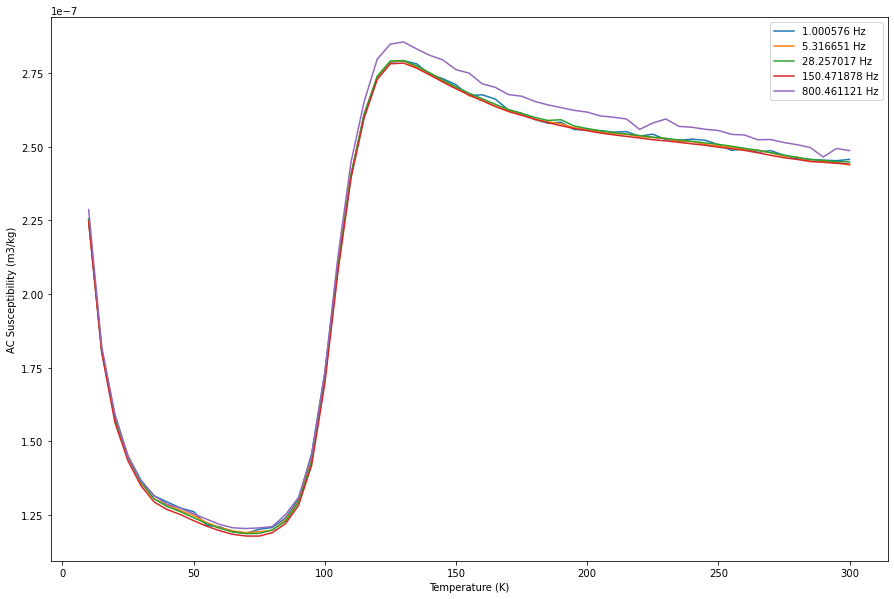

In [35]:
fig,ax = plt.subplots(figsize=(15,10))


ax.plot(X_freq1["Temperature (K)"] , X_freq1['AC Susceptibility (m3/kg)'], label = f'{freqs[0]} Hz')
ax.plot(X_freq2["Temperature (K)"] , X_freq2['AC Susceptibility (m3/kg)'], label = f'{freqs[1]} Hz')
ax.plot(X_freq3["Temperature (K)"] , X_freq3['AC Susceptibility (m3/kg)'], label = f'{freqs[2]} Hz')
ax.plot(X_freq4["Temperature (K)"] , X_freq4['AC Susceptibility (m3/kg)'], label = f'{freqs[3]} Hz')
ax.plot(X_freq5["Temperature (K)"] , X_freq5['AC Susceptibility (m3/kg)'], label = f'{freqs[4]} Hz')

ax.set_xlabel('Temperature (K)')
ax.set_ylabel('AC Susceptibility (m3/kg)')

ax.legend()


##Observations 

NOTE: 800Hz freq has measured incorrectly

All curves: steep drop down to 40K increases to 120K slow drop to 300K 
At all T, susceptibility is lower for higher frequencies - check this is true for all sections of the graph.

